<a href="https://colab.research.google.com/github/skybluesharkk/colab_ml/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
titanic = pd.read_csv('train.csv')

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic = titanic.drop(['Name','Age','PassengerId','Parch','Fare','Cabin','Ticket'],axis=1)
titanic['Sex']=titanic['Sex'].replace({'female': 0, 'male': 1})
mode_value = titanic['Embarked'].mode()[0]
titanic['Embarked'] = titanic['Embarked'].fillna(mode_value)
titanic['Embarked']=titanic['Embarked'].replace({'S':0,'C':1,'Q':2})

In [ ]:
titanic.head()

,Survived,Pclass,Sex,SibSp,Embarked
0,0,3,1,1,0
1,1,1,0,1,1
2,1,3,0,0,0
3,1,1,0,1,0
4,0,3,1,0,0


In [ ]:
titanic_target = titanic['Survived'].to_numpy()
titanic_input = titanic[['Pclass','SibSp','Sex','Embarked']].to_numpy()

In [ ]:
print(titanic)

     Survived  Pclass  Sex  SibSp  Embarked
0           0       3    1      1         0
1           1       1    0      1         1
2           1       3    0      0         0
3           1       1    0      1         0
4           0       3    1      0         0
..        ...     ...  ...    ...       ...
886         0       2    1      0         0
887         1       1    0      0         0
888         0       3    0      1         0
889         1       1    1      0         1
890         0       3    1      0         2

[891 rows x 5 columns]


In [ ]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(titanic_input,titanic_target,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8203592814371258
0.7982062780269058


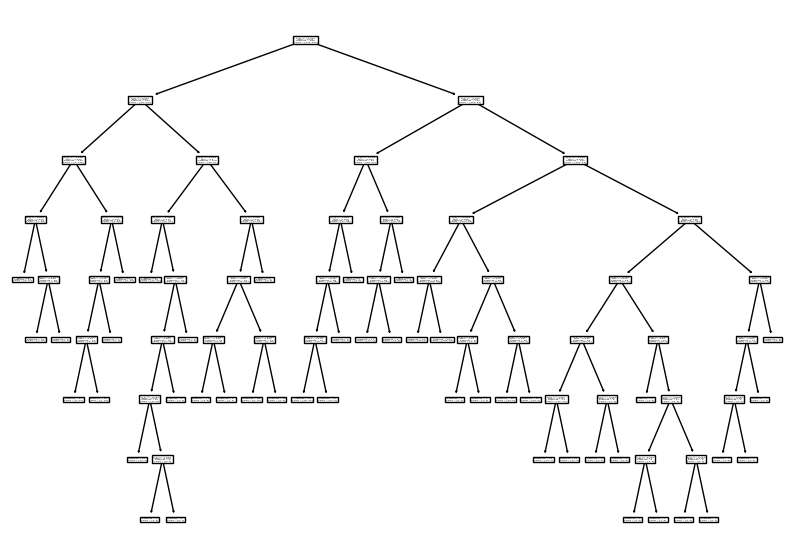

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

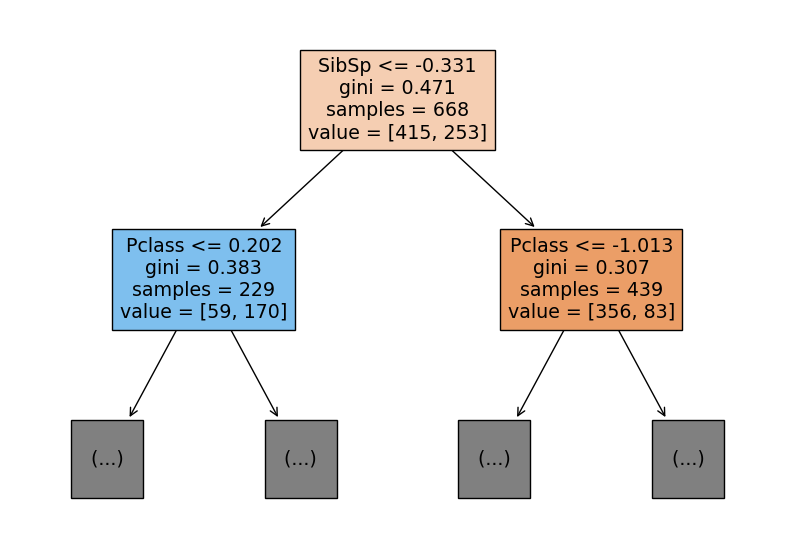

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1,filled=True,feature_names=['Pclass','Sex','SibSp','Embarked'])
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.812874251497006
0.8071748878923767


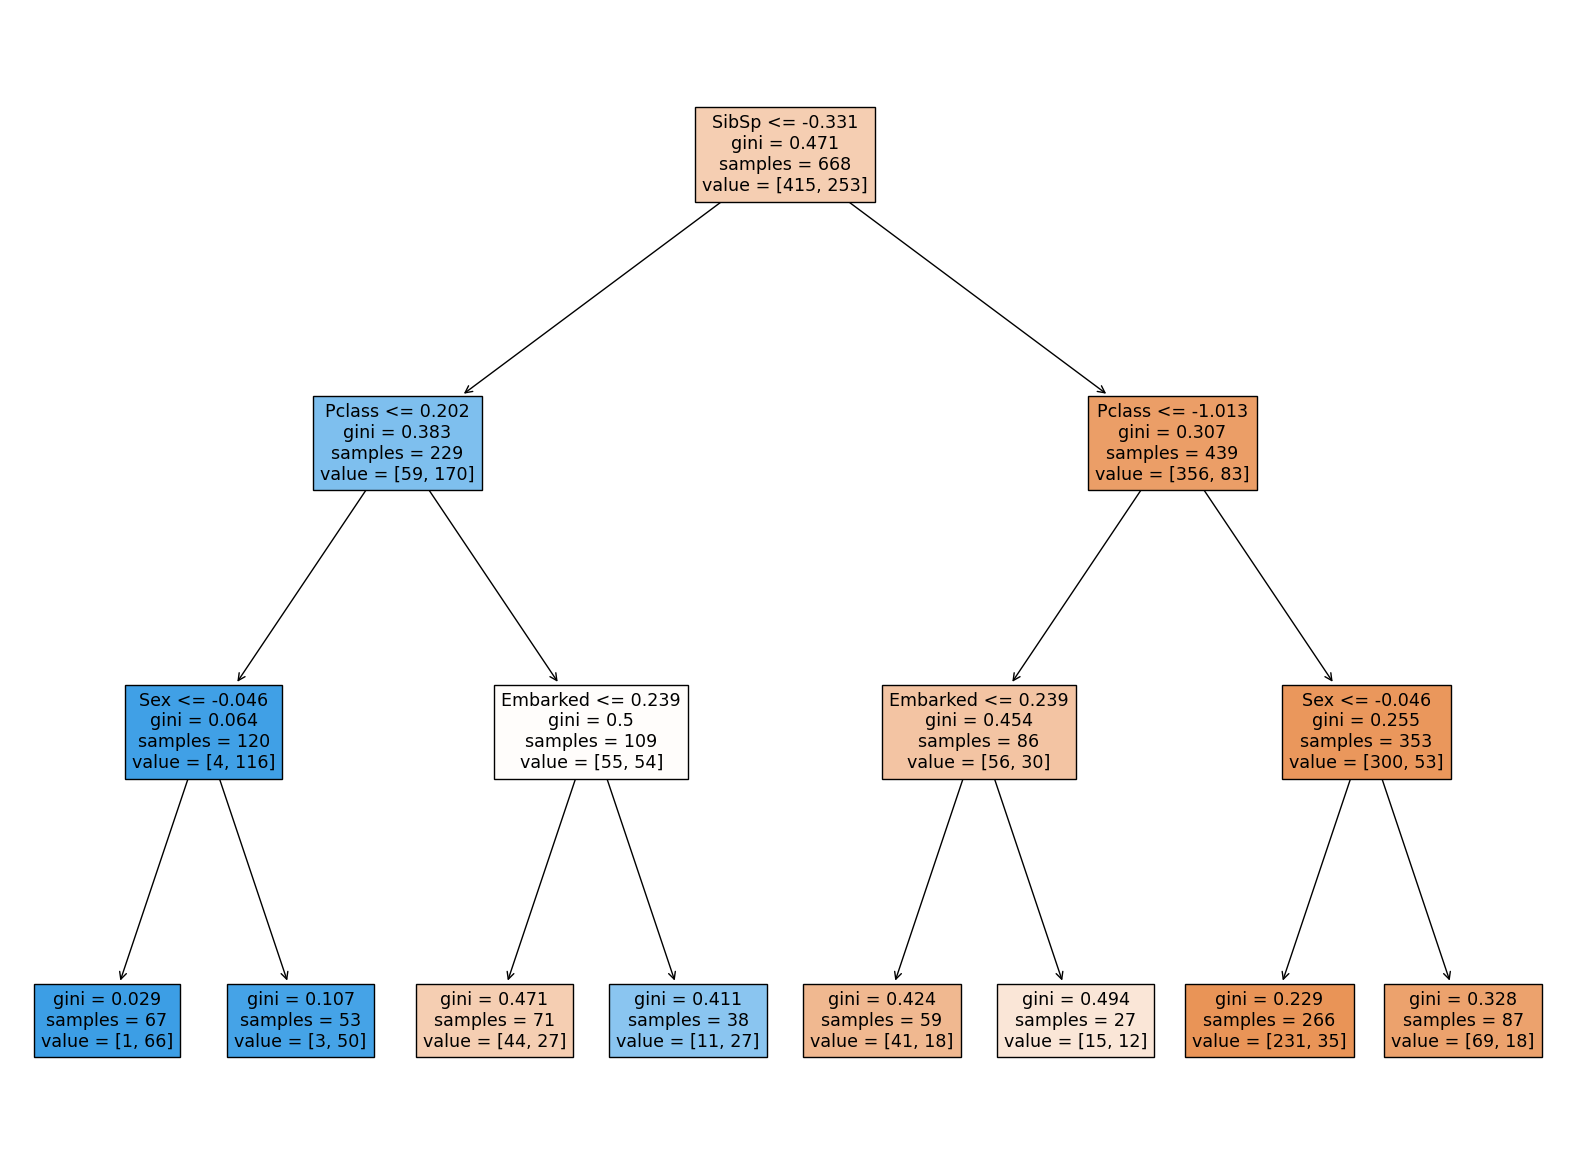

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True,feature_names=['Pclass','Sex','SibSp','Embarked'])
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.812874251497006
0.8071748878923767
